In [ ]:
!pip install tensorflow-gpu

     |████████████████████████████████| 320.4MB 54kB/s 


In [ ]:
!nvidia-smi

Mon Sep 28 15:54:54 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P0    29W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import libraries 

import numpy as np
from tensorflow.keras.layers import Input , Lambda , Dense , Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img
from glob import glob


In [ ]:
#resize all images to this 
IMAGE_SIZE = [224,224]

train_path =" /content/drive/My Drive/Colab Notebooks/ml folder/dataset/train"
valid_path = "/content/drive/My Drive/Colab Notebooks/ml folder/dataset/valid"

In [ ]:
#used resnet50 layers and used trained weights of resnet50
resnet = InceptionResNetV2(input_shape = IMAGE_SIZE + [3] , weights = 'imagenet' , include_top = False) 

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
# dont trained all layers bcz we used trained weights
for layer in resnet.layers :
  layer.trainable = False

In [ ]:
#total output classes by counting total folders in train datasets
folders = glob('/content/drive/My Drive/Colab Notebooks/ml folder/dataset/train/*')

In [ ]:
# flatten the last output layers of the resnet
x= Flatten()(resnet.output)

In [ ]:
prediction = Dense(len(folders) , activation='softmax')(x)
# dense (units , activation) (input_shape)

#create a model

model = Model(inputs = resnet.input , outputs = prediction)

In [ ]:
#view the model structure

model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [ ]:
#cost and optimization method to use in the model
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [ ]:
#data augmentation

train_datagen = ImageDataGenerator(rescale= 1./255 ,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True               
                                   
                                   )

test_datagen = ImageDataGenerator ( rescale = 1./255)

In [ ]:
# make sure the same target size as initialized for the image size
training_set = train_datagen.flow_from_directory ( '/content/drive/My Drive/Colab Notebooks/ml folder/dataset/train',
    target_size = (224,224),
    batch_size = 16,
    class_mode= 'categorical'
)

Found 18345 images belonging to 10 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/ml folder/dataset/valid',
                                            target_size=(224,224),
                                            batch_size=16,
                                            class_mode ='categorical')

Found 4585 images belonging to 10 classes.


In [ ]:
#fit the model and run the cell
r = model.fit_generator(
    training_set ,
    validation_data = test_set ,
    epochs = 20,
    steps_per_epoch = len(training_set),
    validation_steps = len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
1147/1147 [==============================] - 13823s 12s/step - loss: 2.8411 - accuracy: 0.3334 - val_loss: 2.4869 - val_accuracy: 0.4068
Epoch 2/20
1147/1147 [==============================] - 248s 216ms/step - loss: 2.3285 - accuracy: 0.4484 - val_loss: 2.8804 - val_accuracy: 0.4024
Epoch 3/20
1147/1147 [==============================] - 236s 206ms/step - loss: 2.2372 - accuracy: 0.4839 - val_loss: 1.7336 - val_accuracy: 0.5444
Epoch 4/20
1147/1147 [==============================] - 237s 206ms/step - loss: 2.3669 - accuracy: 0.5023 - val_loss: 3.5586 - val_accuracy: 0.5047
Epoch 5/20
1147/1147 [==============================] - 251s 219ms/step - loss: 2.1898 - accuracy: 0.5226 - val_loss: 3.9009 - val_accuracy: 0.4803
Epoch 6/20
1147/1147 [==============================] - 261s 228ms/step - loss: 2.0569 - accuracy: 0.5517 - val_loss: 3.4439 - val_accuracy: 0.4148
Epoch 7/20
1147/1147 [==============

In [ ]:
print("done")

done


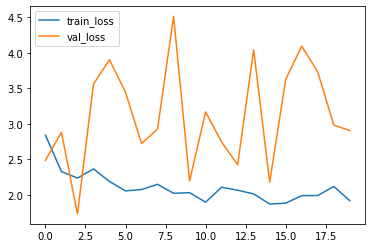

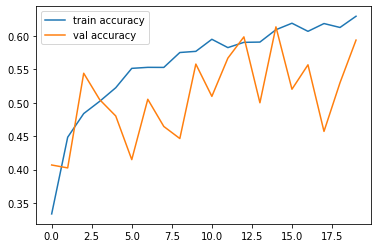

<Figure size 432x288 with 0 Axes>

In [ ]:
#plot the loss
import matplotlib.pyplot as plt

plt.plot(r.history['loss'] , label = "train_loss")
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()
plt.savefig("loss_val_loss")

#plot the accuracy
plt.plot(r.history['accuracy'] , label = 'train accuracy')
plt.plot(r.history['val_accuracy'] , label = 'val accuracy')
plt.legend()
plt.show()
plt.savefig('acc_val_acc')